In [1]:
from utils import *

## Load Data

In [33]:
# If you have the real data,  uncomment the following lines:
# years = [2017] #2013,2014,2015,2016
# n_years=len(years)
# resampling_period = '1h'
# original_data = load_resample_data(years, resampling_period)

original_data = pd.read_csv('raw_data.csv',parse_dates=['DT'],index_col='DT') 

windfarms_names = original_data.columns.tolist() 
original_data.head(3)

year:2017	(105120, 20)
resampled to  (8760, 20)


,WF1,WF2,WF3,WF4,WF5,WF6,WF7,WF8,WF9,WF10,WF11,WF12,WF13,WF14,WF15,WF16,WF17,WF18,WF19,WF20
DT,,,,,,,,,,,,,,,,,,,,
1900-01-01 00:00:00,21.58,18.58,236.25,26.92,4.00,8.00,0.58,0.67,15.33,24.58,39.58,27.33,19.42,13.50,32.50,24.92,1.50,15.17,41.00,36.75
1900-01-01 01:00:00,33.75,34.92,172.75,33.67,4.00,8.00,15.92,5.58,49.67,50.92,30.17,40.17,29.58,39.00,38.75,41.83,15.33,11.92,21.33,33.83
1900-01-01 02:00:00,22.58,30.00,231.58,19.00,4.00,8.00,15.17,4.42,45.83,39.58,36.08,36.50,31.75,34.08,27.67,40.08,20.00,11.25,31.08,37.00


### Calculate Normalize data (equal to Capacity Factor)

In [12]:
# If you have the real data,  uncomment the following lines:
# windfarms = pd.read_excel(os.path.join('NRGstreamData','WindFarms.xlsx')).sort_values(by='Asset ID')
# windfarms_capacity = windfarms['Capacity'].values

windfarms_capacity = pd.read_excel(os.path.join('NRGstreamData','Capacity.xlsx'))['Capacity'].values

normalized_data = original_data / windfarms_capacity

sum_capacities_each_row = np.array(~original_data.isnull().values * windfarms['Capacity'].values).sum(axis=1)
normalized_data['Total'] = original_data.sum(axis=1)/ sum_capacities_each_row

normalized_data.head(3)

,WF1,WF2,WF3,WF4,WF5,WF6,WF7,WF8,WF9,WF10,...,WF12,WF13,WF14,WF15,WF16,WF17,WF18,WF19,WF20,Total
DT,,,,,,,,,,,,,,,,,,,,,
1900-01-01 00:00:00,0.30,0.27,0.79,0.36,0.20,0.50,0.01,0.02,0.20,0.35,...,0.41,0.29,0.21,0.40,0.54,0.04,0.43,0.47,0.43,0.42
1900-01-01 01:00:00,0.46,0.51,0.58,0.45,0.20,0.50,0.41,0.19,0.65,0.72,...,0.60,0.45,0.62,0.47,0.91,0.38,0.34,0.24,0.40,0.49
1900-01-01 02:00:00,0.31,0.44,0.77,0.25,0.20,0.50,0.39,0.15,0.60,0.56,...,0.54,0.48,0.54,0.34,0.87,0.50,0.32,0.35,0.44,0.50


### define what data is going to be used (Original data or Normalized data)

In [13]:
data = normalized_data

In [14]:
data.insert(loc=0, column='year', value=[ts.year for ts in data.index])
data.insert(loc=1, column='season', value=[(ts.month-1)//3 for ts in data.index])
data.insert(loc=2, column='month', value=[ts.month for ts in data.index])
data.insert(loc=3, column='day', value=[ts.day for ts in data.index])
data.insert(loc=4, column='hour', value=[ts.hour for ts in data.index])
data.head()

,year,season,month,day,hour,WF1,WF2,WF3,WF4,WF5,...,WF12,WF13,WF14,WF15,WF16,WF17,WF18,WF19,WF20,Total
DT,,,,,,,,,,,,,,,,,,,,,
1900-01-01 00:00:00,1900,0,1,1,0,0.30,0.27,0.79,0.36,0.20,...,0.41,0.29,0.21,0.40,0.54,0.04,0.43,0.47,0.43,0.42
1900-01-01 01:00:00,1900,0,1,1,1,0.46,0.51,0.58,0.45,0.20,...,0.60,0.45,0.62,0.47,0.91,0.38,0.34,0.24,0.40,0.49
1900-01-01 02:00:00,1900,0,1,1,2,0.31,0.44,0.77,0.25,0.20,...,0.54,0.48,0.54,0.34,0.87,0.50,0.32,0.35,0.44,0.50
1900-01-01 03:00:00,1900,0,1,1,3,0.41,0.49,0.67,0.38,0.20,...,0.84,0.81,0.57,0.27,0.89,0.53,0.32,0.28,0.23,0.50
1900-01-01 04:00:00,1900,0,1,1,4,0.49,0.51,0.77,0.48,0.20,...,0.83,0.75,0.57,0.51,0.83,0.59,0.63,0.19,0.47,0.54


## Plot the capacity factor (CF) of all windfarm in each hour for the last years

In [15]:
cf = data

In [16]:
hours_name = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', 
              '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']

colors_dict={
'12 am': [0,0,102],
'1 am': [25,25,112],
'2 am': [25,25,112],
'3 am': [25,25,112],
'4 am': [20,20,153],
'5 am': [0,0,205],
'6 am': [0,105,225],
'7 am': [102,178,255],
'8 am': [204,255,255],
'9 am': [255,255,204],
'10 am': [255,255,153],
'11 am': [255,225,70],
'12 pm': [255,215,0],
'1 pm': [255,215,0],
'2 pm': [255,215,0],
'3 pm': [255,215,0],
'4 pm': [255,235,30],
'5 pm': [255,245,100],
'6 pm': [255,255,150],
'7 pm': [255,255,204],
'8 pm': [200,240,255],
'9 pm': [0,105,225],
'10 pm': [0,0,205],
'11 pm': [20,20,153]}
colors_24 = colors_dict.values()
colors_24 = np.array(list(colors_24))/255

In [17]:
cf_hourly_avg_all_windfarms_old = cf.groupby(['hour']).mean().iloc[:,-21:-1].mean() #: this is not very correct
cf_hourly_avg_all_windfarms = cf.groupby(['hour']).mean()['Total']

# cf_hourly_avg_var = cf.groupby('hour').var().iloc[:,-21:-1].mean(axis=1)

cf_hourly_avg_all_windfarms.index = hours_name

In [18]:
colors = [(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0)]

In [19]:
cf.groupby(['hour','season']).mean()['Total'].unstack()

season,0,1,2,3
hour,,,,
0,0.36,0.37,0.30,0.48
1,0.37,0.37,0.29,0.48
2,0.37,0.36,0.27,0.47
3,0.38,0.36,0.25,0.47
4,0.38,0.35,0.23,0.46
5,0.37,0.35,0.22,0.46
6,0.36,0.35,0.21,0.46
7,0.35,0.33,0.20,0.46
8,0.34,0.30,0.17,0.46


/home/mohammad/anaconda3/envs/py36_project/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


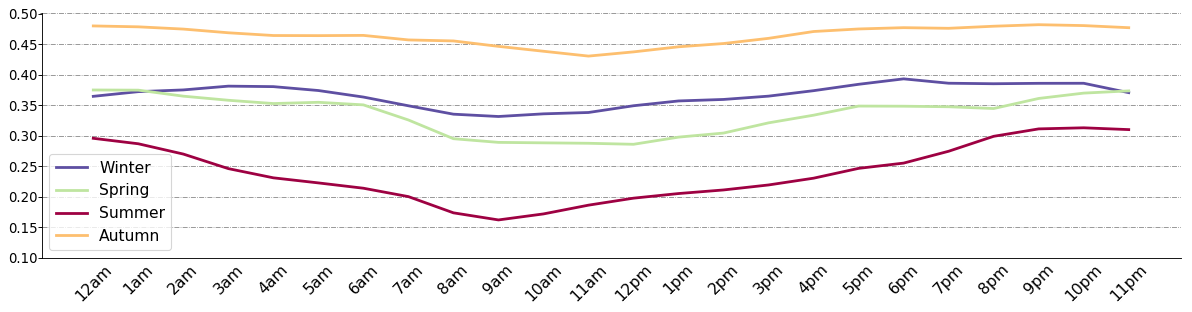

In [20]:
a = cf.groupby(['hour','season']).mean()['Total'].unstack()
a.index = hours_name

data_here = a

fig, ax = plt.subplots(dpi=80)
data_here.plot(kind='line',figsize=(15,4),legend=False,color =colors, ax = ax, lw=2.5) #yerr=cf_hourly_avg_var.values

ax.tick_params(axis='x', labelsize = 14, which='both', pad=0, rotation=45 , color = 'w')
ax.tick_params(axis='y', labelsize = 12, which='both', pad=0, rotation=0  , color = 'k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_yticks(np.arange(0.1,0.55,0.05),minor=True)

ax.set_xticks(np.arange(0,len(data_here.index))) #minor=True
ax.set_xticklabels(data_here.index)

ax.set_xmargin(0)
ax.set_ymargin(0)
ax.set_axisbelow(True)
ax.grid(color='k', linestyle='-.', linewidth=0.7, alpha = 0.5, which = 'minor')

ax.legend(["Winter", "Spring","Summer","Autumn"], fontsize=14, facecolor = 'w')

fig.tight_layout()
# fig.savefig('hourly_CF_seasonal.jpg', papertype='letter', dpi = 300, bbox_inches='tight')    

In [21]:
# colors = [ax.get_children()[i].get_color() for i in range(0,4)]
# # colors = np.array(colors)
# my_order = [3,2,0,1]
# colors = [colors[my_order[i]] for i in range(4)]
# colors

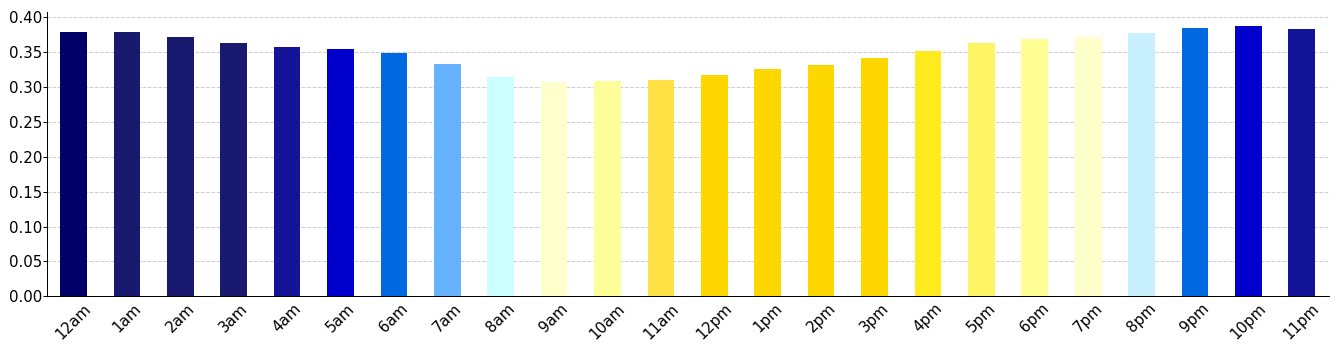

In [22]:
data_here = cf_hourly_avg_all_windfarms

fig,ax = plt.subplots(dpi=90)
data_here.plot(kind='bar',figsize=(15,4),legend=False,color=colors_24) #yerr=cf_hourly_avg_var.values

ax.tick_params(axis='x', labelsize = 12, which='both', pad=0, rotation=45 , color = 'w')
ax.tick_params(axis='y', labelsize = 12, which='both', pad=0, rotation=0  , color = 'k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks(np.arange(0,0.41,0.05),minor=True)

ax.set_xmargin(0)
ax.set_ymargin(0)
ax.set_axisbelow(True)
ax.grid(color='k', linestyle='-.', linewidth=0.4, alpha = 0.4, which = 'minor')

fig.tight_layout()

# fig.savefig('hourly_CF.jpg', papertype='letter', dpi = 300, bbox_inches='tight')    

In [23]:
cf_hourly_avg_all_windfarms.mean()

0.35104039766685435

## Average hourly capacity factor for Eech Wind Farm

In [24]:
cf_hourly_avg = cf.groupby('hour').mean().iloc[:,-21:-1]
cf_hourly_avg.index = hours_name

# cf_hourly_var = cf.groupby('hour').var()

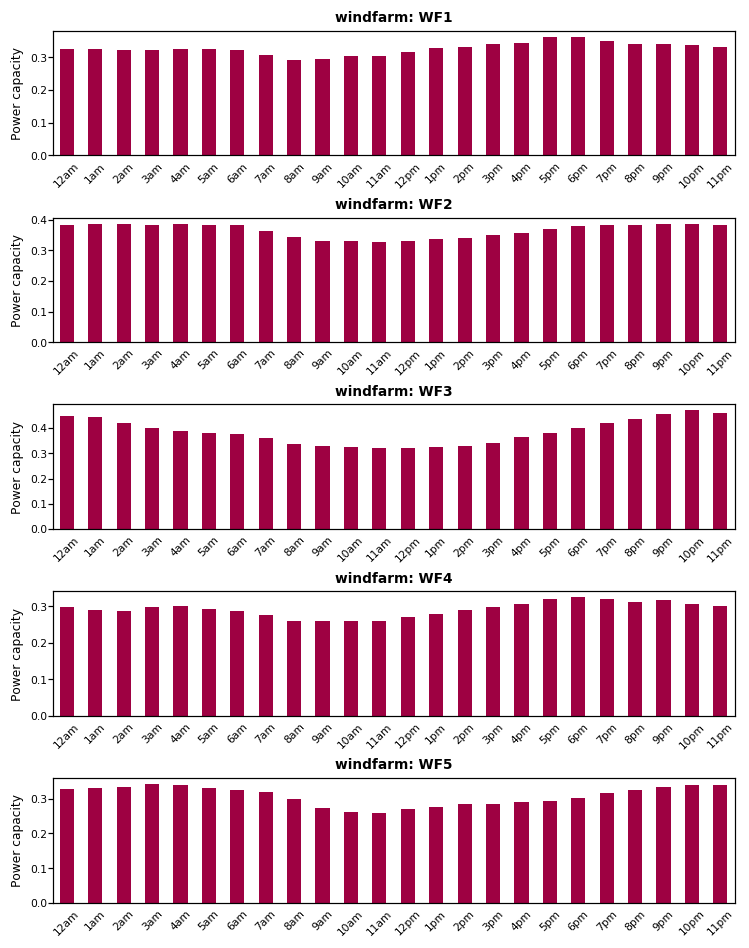

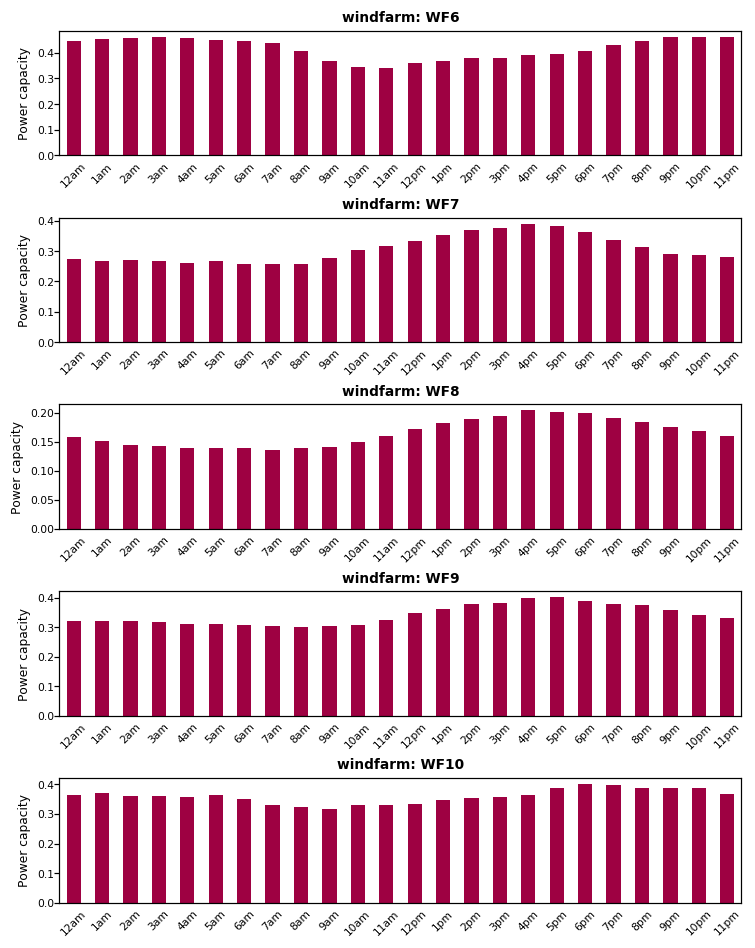

In [30]:
data_here = cf_hourly_avg
total_plots = 10 # maximum : 20
n_rows = 5 ; figsize_r = 10.5
n_cols = 1 ; figsize_c = 8
n_plots = n_rows * n_cols
Title = ' Average hourly wind power of each windfarms during last years'
savefig = 0

for p in range(int(-(-total_plots//n_plots))):
    fig, axar = plt.subplots(n_rows, n_cols,figsize=(figsize_c,figsize_r), dpi=110)
    fig.subplots_adjust(hspace=0.5, wspace=0.05)        

    ind = 0
    for i in range(n_plots*p,min(n_plots*(p+1),total_plots)):
        
        dv_df = data_here.iloc[:,i]#.values.reshape(len(years),-1)

        if n_cols ==1:
            ax = axar[ind]
        elif n_cols > 1:
            r = ind // n_cols
            c = ind % n_cols
            ax = axar[r, c]    

        ax = dv_df.plot(kind='bar', ax = ax, legend=False, colormap='Spectral')
        # ax.legend(['AKE1'],loc='best', fontsize = 7, ncol=len(years))
        ax.tick_params(axis='x', labelsize = 7, which='major', pad=0, rotation=45 , color = 'w')
        ax.tick_params(axis='y', labelsize = 7, which='major', pad=0, rotation=0 , color = 'k')
        ax.set_title('windfarm: {}'.format(windfarms_names[i]), fontsize=9, weight='bold')
        # ax.set_ylim(bottom =0 , top = 0.5)

        ax.set_ylabel('Power capacity',fontsize=8)
        
        if savefig:
            fig.savefig(Title+str(p)+'.jpg', papertype='letter', dpi = 300, bbox_inches='tight')    

        ind = ind + 1
        #plt.close()

## Same plot, but by more elegant way (groupby) which is much more generalizable

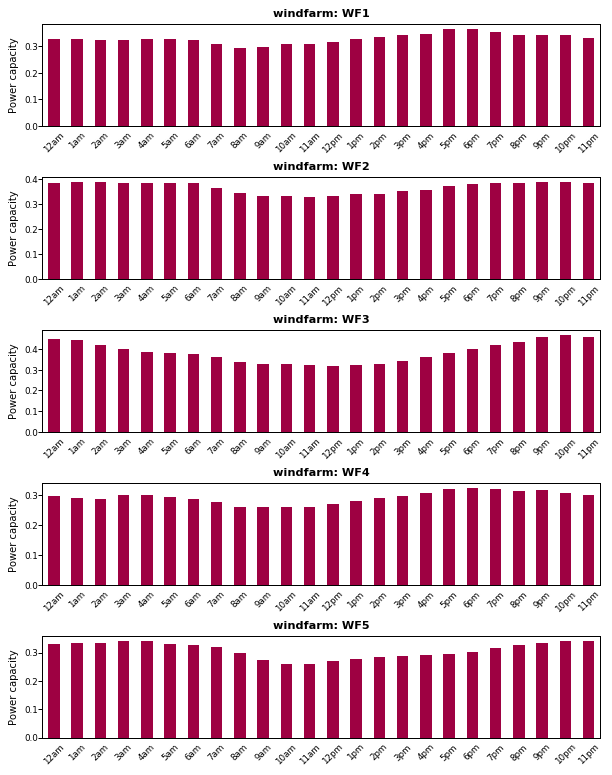

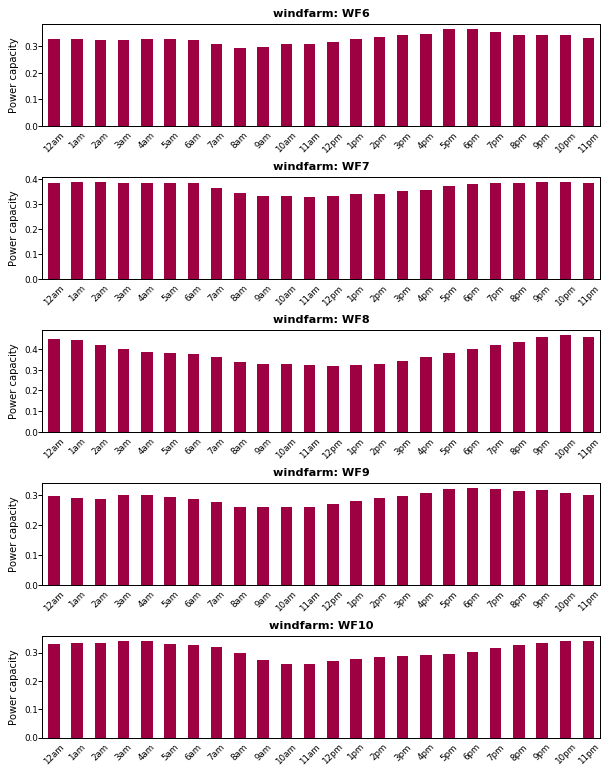

In [32]:
data_here = cf.copy()
variables = ['hour'] #,'season'
data_here = data_here.groupby(variables).mean()
legends = {'year': years, 'season': ['Winter','Spring', 'Summer','Autumn'],
           'month':[datetime.date(2008, i, 1).strftime('%B') for i in range(1,13)],
          'hour': hours_name  
          }
### ----------------------------------------------------------------------------------------------- 
total_plots = 10  
n_rows = 5 ; figsize_r = 10.5
n_cols = 1 ; figsize_c = 8
n_plots = n_rows * n_cols # n_plots in each figure(page)
Title = ' Average hourly wind power of each windfarms during last years1'
savefig = 0

for p in range(int(-(-total_plots//n_plots))):
    fig, axar = plt.subplots(n_rows, n_cols,figsize=(figsize_c,figsize_r), dpi=90)
    fig.subplots_adjust(hspace=0.5, wspace=0.05)        

    ind = 0
    for i in range(n_plots*p,min(n_plots*(p+1),total_plots)):
        
        if len(variables) > 1:
            dv_df = data_here[windfarms_names[ind]].unstack()
        else:
            dv_df = data_here[windfarms_names[ind]]
            
        dv_df.index = legends[variables[0]]
        
        #print(dv_df)
        if n_cols ==1:
            ax = axar[ind]
        elif n_cols > 1:
            r = ind // n_cols
            c = ind % n_cols
            ax = axar[r, c]    

        ax = dv_df.plot(kind='bar', ax = ax, colormap='Spectral', legend=False) #subplots=True
        # ax.legend(years,loc='upper center', fontsize = 7, ncol=len(years))
        ax.tick_params(axis='x', labelsize = 7, which='major', pad=0, rotation=45 , color = 'w')
        ax.tick_params(axis='y', labelsize = 7, which='major', pad=0, rotation=0 , color = 'k')
        ax.set_title('windfarm: {}'.format(windfarms_names[i]), fontsize=9, weight='bold')
        # ax.set_ylim(bottom =0 , top = windfarms['Capacity'][i])

        ax.set_ylabel('Power capacity',fontsize=8)
        
        if savefig:
            fig.savefig(Title+str(p)+'.jpg', papertype='letter', dpi = 300, bbox_inches='tight')    

        ind = ind + 1
        # plt.close();